In [1]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import xgboost as xgb

# Load the dataset (replace with your actual dataset path)
data = pd.read_csv("yield_df.csv")

# Encoding categorical features (Area, Item)
label_encoders = {}
for column in ['Area', 'Item']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target variable (y)
X = data[['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = data['hg/ha_yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model 1: Neural Network ###
# Build the model
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
nn_loss, nn_mae = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network - Loss: {nn_loss:.4f}, MAE: {nn_mae:.4f}")

# Predict with Neural Network
nn_predictions = nn_model.predict(X_test)

### Model 2: XGBoost ###
# Train the XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,       # Maximum depth of trees
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Evaluate the model
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost - MSE: {xgb_mse:.4f}")

# Compare results
print("\nModel Comparison:")
print(f"Neural Network MAE: {nn_mae:.4f}")
print(f"XGBoost MSE: {xgb_mse:.4f}")


C:\Users\manda\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13463960576.0000 - mae: 76617.6250 - val_loss: 12095713280.0000 - val_mae: 73523.6016
Epoch 2/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12733624320.0000 - mae: 75032.6641 - val_loss: 11740286976.0000 - val_mae: 71459.7891
Epoch 3/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12199806976.0000 - mae: 72085.0703 - val_loss: 10882410496.0000 - val_mae: 66403.6797
Epoch 4/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11311729664.0000 - mae: 66393.1875 - val_loss: 9648659456.0000 - val_mae: 59242.8828
Epoch 5/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10047480832.0000 - mae: 60257.9766 - val_loss: 8375110144.0000 - val_mae: 53930.2930
Epoch 6/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8676335616.0000 - mae: 55260.1719 - val_loss: 7413457920.0000 - val_mae: 52636.8867
Epoch 7/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7642726912.0000 - mae: 54330.6562 - val_loss: 6884490240.0000 - val_

In [3]:
from sklearn.metrics import r2_score

In [4]:
# Calculate R-squared for Neural Network
nn_r2 = r2_score(y_test, nn_predictions)
print(f"Neural Network - R-squared: {nn_r2:.4f}")

# Calculate R-squared for XGBoost
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"XGBoost - R-squared: {xgb_r2:.4f}")

# Final Comparison
print("\nModel Comparison (R-squared):")
if nn_r2 > xgb_r2:
    print(f"Neural Network performs better with R-squared: {nn_r2:.4f}")
else:
    print(f"XGBoost performs better with R-squared: {xgb_r2:.4f}")

Neural Network - R-squared: 0.1215
XGBoost - R-squared: 0.9712

Model Comparison (R-squared):
XGBoost performs better with R-squared: 0.9712


In [ ]:
#IMPROVED NNN

In [5]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Build the improved neural network model
improved_nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)),  # Increased neurons, added L2 regularization
    Dropout(0.3),  # Adding dropout to prevent overfitting
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model with Adam optimizer and Mean Squared Error loss
optimizer = Adam(learning_rate=0.001)  # Adjusted learning rate
improved_nn_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Add callbacks: learning rate scheduler and early stopping
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6),
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
]

# Train the improved model
history = improved_nn_model.fit(
    X_train, y_train,
    epochs=100,  # Increased epochs
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=callbacks
)

# Evaluate the improved model
improved_nn_loss, improved_nn_mae = improved_nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Improved Neural Network - Loss: {improved_nn_loss:.4f}, MAE: {improved_nn_mae:.4f}")

# Predict with the improved Neural Network
improved_nn_predictions = improved_nn_model.predict(X_test)

# Calculate R-squared for improved NN
from sklearn.metrics import r2_score
improved_nn_r2 = r2_score(y_test, improved_nn_predictions)
print(f"Improved Neural Network - R-squared: {improved_nn_r2:.4f}")


Epoch 1/100


C:\Users\manda\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 12641776640.0000 - mae: 74459.4609 - val_loss: 8771796992.0000 - val_mae: 54011.0234 - learning_rate: 0.0010
Epoch 2/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7736424960.0000 - mae: 54380.3281 - val_loss: 6259559424.0000 - val_mae: 56784.0703 - learning_rate: 0.0010
Epoch 3/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6545062400.0000 - mae: 57647.7773 - val_loss: 6183642112.0000 - val_mae: 56634.3203 - learning_rate: 0.0010
Epoch 4/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6498169344.0000 - mae: 57323.6211 - val_loss: 6135825920.0000 - val_mae: 56375.4180 - learning_rate: 0.0010
Epoch 5/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6315344896.0000 - mae: 56943.8164 - val_loss: 6113319936.0000 - val_mae: 56664.8047 - learning_rate: 0.0010
Epoch 6/100
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6371379200.0000 - mae: 57081.2500 - val_loss: 6089796608.0000 - val_mae: 56661.8438 - learning_rate: 0.00

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
    

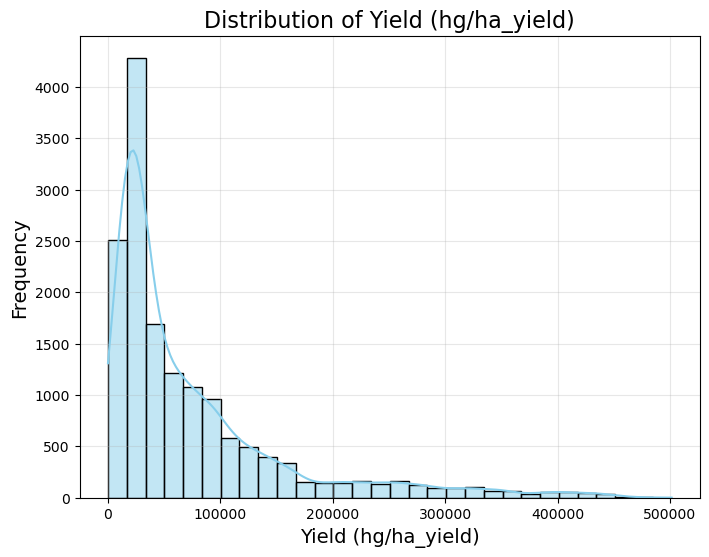

In [7]:
# 1. Variability in Target (hg/ha_yield) Distribution
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color="skyblue", bins=30)
plt.title("Distribution of Yield (hg/ha_yield)", fontsize=16)
plt.xlabel("Yield (hg/ha_yield)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

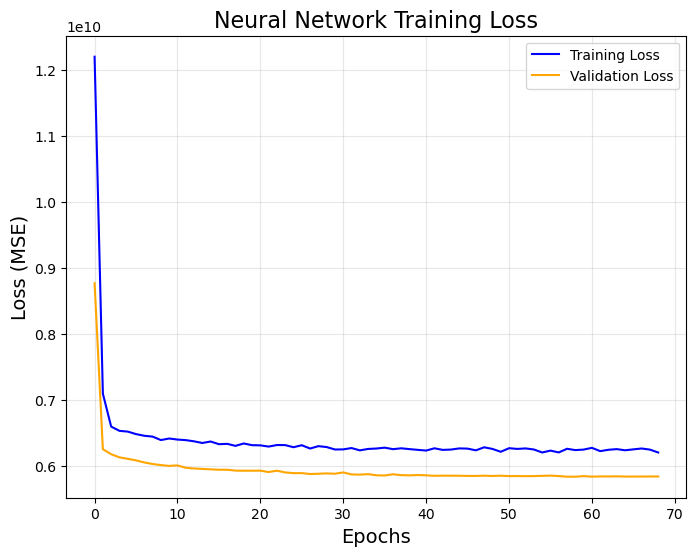

In [8]:
# 2. Model Loss/Performance during Training (Neural Network)
if 'history' in locals():
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title("Neural Network Training Loss", fontsize=16)
    plt.xlabel("Epochs", fontsize=14)
    plt.ylabel("Loss (MSE)", fontsize=14)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

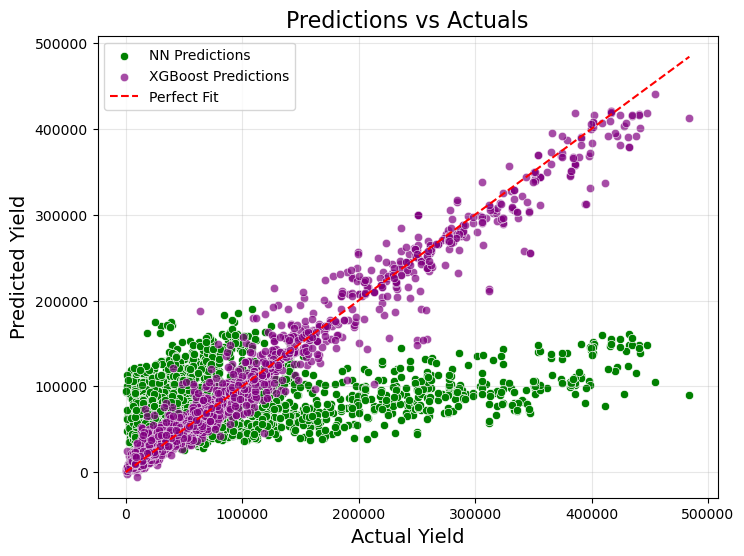

In [9]:
# 3. Model Predictions vs Actuals (Scatter Plot for Comparison)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=improved_nn_predictions.flatten(), color='green', label='NN Predictions')
sns.scatterplot(x=y_test, y=xgb_predictions, color='purple', label='XGBoost Predictions', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title("Predictions vs Actuals", fontsize=16)
plt.xlabel("Actual Yield", fontsize=14)
plt.ylabel("Predicted Yield", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [10]:
# 4. R-squared Comparison for Models (Bar Chart)
model_r2_scores = {
    "Neural Network": improved_nn_r2,
    "XGBoost": xgb_r2
}


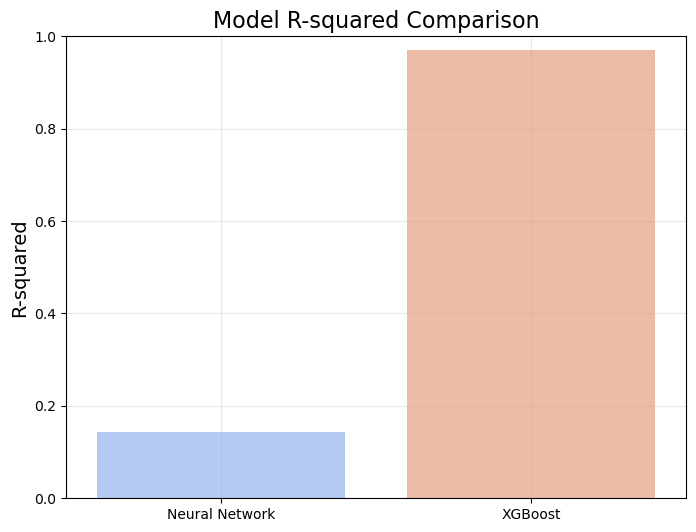

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(model_r2_scores.keys()), y=list(model_r2_scores.values()), palette="coolwarm")
plt.title("Model R-squared Comparison", fontsize=16)
plt.ylabel("R-squared", fontsize=14)
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.show()

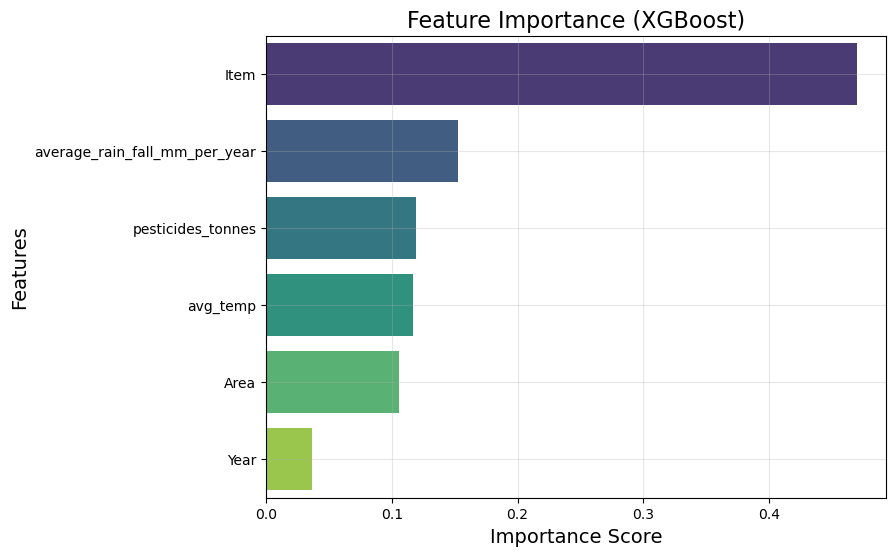

In [13]:
 #Feature Importance for XGBoost 
if hasattr(xgb_model, 'feature_importances_'):
    plt.figure(figsize=(8, 6))
    feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
    feature_importance = feature_importance.sort_values(ascending=False)
    sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
    plt.title("Feature Importance (XGBoost)", fontsize=16)
    plt.xlabel("Importance Score", fontsize=14)
    plt.ylabel("Features", fontsize=14)
    plt.grid(alpha=0.3)
    plt.show()

In [ ]:
#Code to Check Overfitting or Underfitting



In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Neural Network Performance on Training and Testing Data
nn_train_predictions = nn_model.predict(X_train)
nn_test_predictions = nn_model.predict(X_test)

nn_train_mse = mean_squared_error(y_train, nn_train_predictions)
nn_test_mse = mean_squared_error(y_test, nn_test_predictions)

nn_train_r2 = r2_score(y_train, nn_train_predictions)
nn_test_r2 = r2_score(y_test, nn_test_predictions)

print("\nNeural Network Performance:")
print(f"Training MSE: {nn_train_mse:.4f}, Testing MSE: {nn_test_mse:.4f}")
print(f"Training R-squared: {nn_train_r2:.4f}, Testing R-squared: {nn_test_r2:.4f}")

# XGBoost Performance on Training and Testing Data
xgb_train_predictions = xgb_model.predict(X_train)
xgb_test_predictions = xgb_model.predict(X_test)

xgb_train_mse = mean_squared_error(y_train, xgb_train_predictions)
xgb_test_mse = mean_squared_error(y_test, xgb_test_predictions)

xgb_train_r2 = r2_score(y_train, xgb_train_predictions)
xgb_test_r2 = r2_score(y_test, xgb_test_predictions)

print("\nXGBoost Performance:")
print(f"Training MSE: {xgb_train_mse:.4f}, Testing MSE: {xgb_test_mse:.4f}")
print(f"Training R-squared: {xgb_train_r2:.4f}, Testing R-squared: {xgb_test_r2:.4f}")

# Check if Model is Overfitted, Underfitted, or Good
def check_model_status(train_score, test_score):
    if train_score > test_score + 0.1:  # Significant drop in testing score
        return "Overfitted"
    elif train_score < 0.5 and test_score < 0.5:  # Both scores are low
        return "Underfitted"
    else:
        return "Good Fit"

print("\nModel Status:")
print(f"Neural Network: {check_model_status(nn_train_r2, nn_test_r2)}")
print(f"XGBoost: {check_model_status(xgb_train_r2, xgb_test_r2)}")


381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Neural Network Performance:
Training MSE: 6263459366.3425, Testing MSE: 6416508882.3054
Training R-squared: 0.1200, Testing R-squared: 0.1215

XGBoost Performance:
Training MSE: 163469252.3145, Testing MSE: 210426106.2882
Training R-squared: 0.9770, Testing R-squared: 0.9712

Model Status:
Neural Network: Underfitted
XGBoost: Good Fit
